In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option("display.max_columns",None)
#pd.pandas.set_option("display.max_rows",None)

In [2]:
data=pd.read_csv("data.csv")

In [3]:
data

,Time,air_pressure[mmHg],air_temperature[degree celcius],relative_humidity[%],wind_speed[M/S],solar_irridiation[W/m²],electricity_demand_values[kw],heat_demand_values[kw]
0,12/1/2010 0:00,729.7,25.0,85.0,5.0,0,289.567557,432.940036
1,12/1/2010 1:00,729.4,27.8,77.0,7.0,0,260.168520,473.935901
2,12/1/2010 2:00,728.9,33.3,62.0,7.0,0,247.273585,483.278761
3,12/1/2010 3:00,731.6,32.2,62.0,2.0,0,257.955878,545.921252
4,12/1/2010 4:00,732.6,22.8,96.0,3.0,0,258.255081,550.526112
...,...,...,...,...,...,...,...,...
70075,11/28/2018 19:00,733.3,24.4,60.0,3.0,262,379.637300,626.192823
70076,11/28/2018 20:00,733.6,27.8,56.0,4.0,0,369.976634,609.519357
70077,11/28/2018 21:00,732.1,38.3,22.0,0.0,0,365.009491,571.465130
70078,11/28/2018 22:00,735.3,36.7,25.0,4.0,0,396.966494,583.703242


# PRE PROCESSING

In [5]:
features_with_na=[features for features in data.columns if data[features].isnull().sum()]

for feature in features_with_na:
    
    print(feature,(data[feature].isnull().sum()))

air_pressure[mmHg] 146
air_temperature[degree celcius] 177
relative_humidity[%] 177
wind_speed[M/S] 955
electricity_demand_values[kw] 7
heat_demand_values[kw] 7


In [6]:
 data["heat_demand_values[kw]"].fillna(data["heat_demand_values[kw]"].mean(),inplace=True)

In [7]:
 data["electricity_demand_values[kw]"].fillna(data["electricity_demand_values[kw]"].mean(),inplace=True)

In [8]:
 data["wind_speed[M/S]"].fillna(data["wind_speed[M/S]"].mean(),inplace=True)

In [9]:
 data["air_temperature[degree celcius]"].fillna(data["air_temperature[degree celcius]"].mean(),inplace=True)

In [10]:
 data["air_pressure[mmHg]"].fillna(data["air_pressure[mmHg]"].mean(),inplace=True)

In [63]:
data.isnull().sum()

Time                               0
air_pressure[mmHg]                 0
air_temperature[degree celcius]    0
relative_humidity[%]               0
wind_speed[M/S]                    0
solar_irridiation[W/m²]            0
electricity_demand_values[kw]      0
heat_demand_values[kw]             0
Month                              0
Year                               0
Date                               0
dtype: int64

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70080 entries, 0 to 70079
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Time                             70080 non-null  object 
 1   air_pressure[mmHg]               70080 non-null  float64
 2   air_temperature[degree celcius]  70080 non-null  float64
 3   relative_humidity[%]             70080 non-null  float64
 4   wind_speed[M/S]                  70080 non-null  float64
 5   solar_irridiation[W/m²]          70080 non-null  int64  
 6   electricity_demand_values[kw]    70080 non-null  float64
 7   heat_demand_values[kw]           70080 non-null  float64
 8   Month                            70080 non-null  int64  
 9   Year                             70080 non-null  int64  
 10  Date                             70080 non-null  object 
dtypes: float64(6), int64(3), object(2)
memory usage: 5.9+ MB


# Generating Time Year Column for Data

In [11]:
# Extract all Data Like Year MOnth Day Time etc
dataset = data
dataset["Month"] = pd.to_datetime(data["Time"]).dt.month
dataset["Year"] = pd.to_datetime(data["Time"]).dt.year
dataset["Date"] = pd.to_datetime(data["Time"]).dt.date
dataset["Time"] = pd.to_datetime(data["Time"]).dt.time

In [12]:
data

,Time,air_pressure[mmHg],air_temperature[degree celcius],relative_humidity[%],wind_speed[M/S],solar_irridiation[W/m²],electricity_demand_values[kw],heat_demand_values[kw],Month,Year,Date
0,00:00:00,729.7,25.0,85.0,5.0,0,289.567557,432.940036,12,2010,2010-12-01
1,01:00:00,729.4,27.8,77.0,7.0,0,260.168520,473.935901,12,2010,2010-12-01
2,02:00:00,728.9,33.3,62.0,7.0,0,247.273585,483.278761,12,2010,2010-12-01
3,03:00:00,731.6,32.2,62.0,2.0,0,257.955878,545.921252,12,2010,2010-12-01
4,04:00:00,732.6,22.8,96.0,3.0,0,258.255081,550.526112,12,2010,2010-12-01
...,...,...,...,...,...,...,...,...,...,...,...
70075,19:00:00,733.3,24.4,60.0,3.0,262,379.637300,626.192823,11,2018,2018-11-28
70076,20:00:00,733.6,27.8,56.0,4.0,0,369.976634,609.519357,11,2018,2018-11-28
70077,21:00:00,732.1,38.3,22.0,0.0,0,365.009491,571.465130,11,2018,2018-11-28
70078,22:00:00,735.3,36.7,25.0,4.0,0,396.966494,583.703242,11,2018,2018-11-28


In [13]:
# How many Unique Year do we Have in Dataset 
print(data.Year.unique(),"\n")
print("Total Number of Unique Year", data.Year.nunique(), "\n")

[2010 2011 2012 2013 2014 2015 2016 2017 2018] 

Total Number of Unique Year 9 



# Exploratory Data Analysis

# consumption Each Year

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Energy Consumption According to Year')

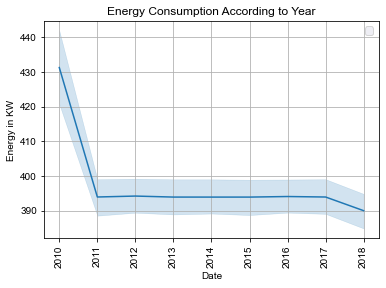

In [14]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x=data["Year"], y=dataset["electricity_demand_values[kw]"], data=data)
sns.set(rc={'figure.figsize':(15,2)})

plt.title("Energy consumption Per Year")
plt.xlabel("Date")
plt.ylabel("Energy in KW")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Energy Consumption According to Year")

# Voltage Used in Each Month in 2010/2011/2012

No handles with labels found to put in legend.


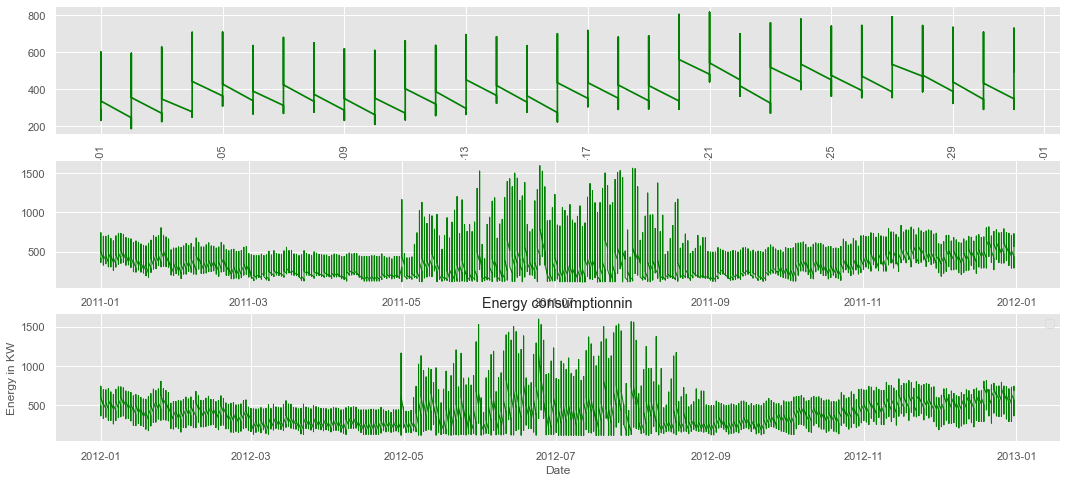

In [16]:
from matplotlib import style


fig = plt.figure()

ax1= fig.add_subplot(311)
ax2= fig.add_subplot(312)
ax3= fig.add_subplot(313)


style.use('ggplot')

y_2010 = data.loc[data["Year"]==2010]["electricity_demand_values[kw]"].to_list()
x_2010 = data.loc[data["Year"]==2010]["Date"].to_list()
ax1.plot(x_2010,y_2010, color="green", linewidth=1.7)


y_2011 =data.loc[data["Year"]==2011]["electricity_demand_values[kw]"].to_list()
x_2011 =data.loc[data["Year"]==2011]["Date"].to_list()
ax2.plot(x_2011, y_2011, color="green", linewidth=1)


y_2012 = data.loc[data["Year"]==2012]["electricity_demand_values[kw]"].to_list()
x_2012 = data.loc[data["Year"]==2012]["Date"].to_list()
ax3.plot(x_2012, y_2012, color="green", linewidth=1)


plt.rcParams["figure.figsize"] = (20,8)
plt.title("Energy consumptionnin")
plt.xlabel("Date")
plt.ylabel("Energy in KW")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

# Voltage Consumption in Each Month  in 2013/2014/2015

No handles with labels found to put in legend.


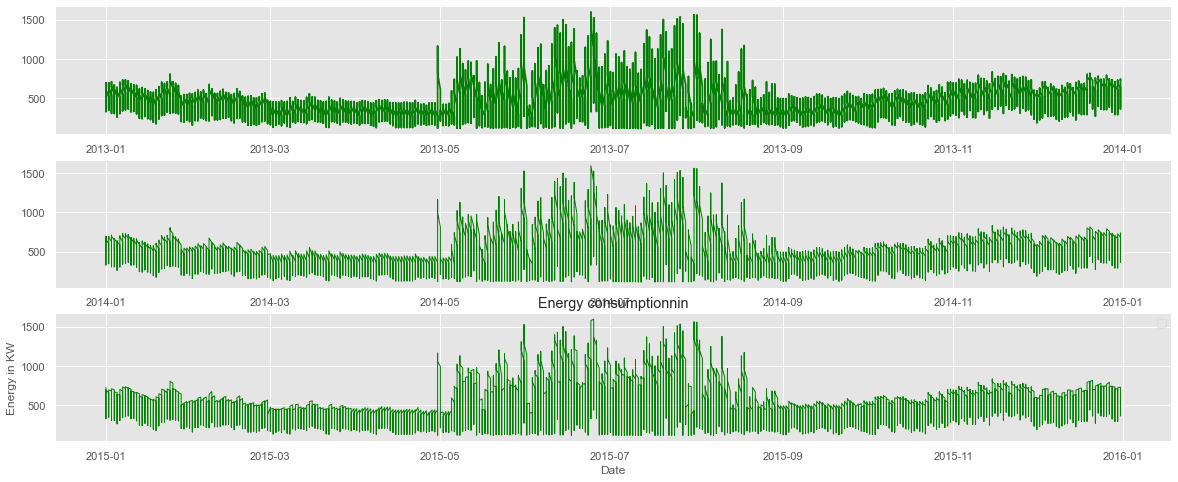

In [17]:
from matplotlib import style


fig = plt.figure()

ax4= fig.add_subplot(311)
ax5= fig.add_subplot(312)
ax6= fig.add_subplot(313)


style.use('ggplot')

y_2013 = data.loc[data["Year"]==2013]["electricity_demand_values[kw]"].to_list()
x_2013 = data.loc[data["Year"]==2013]["Date"].to_list()
ax4.plot(x_2013, y_2013, color="green", linewidth=1.7)



y_2014 = data.loc[data["Year"]==2014]["electricity_demand_values[kw]"].to_list()
x_2014 = data.loc[data["Year"]==2014]["Date"].to_list()
ax5.plot(x_2014, y_2014, color="green", linewidth=1)


y_2015 = data.loc[data["Year"]==2015]["electricity_demand_values[kw]"].to_list()
x_2015 = data.loc[data["Year"]==2015]["Date"].to_list()
ax6.plot(x_2015, y_2015, color="green", linewidth=1)


plt.rcParams["figure.figsize"] = (15,2)
plt.title("Energy consumptionnin")
plt.xlabel("Date")
plt.ylabel("Energy in KW")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

# Voltage Consumption in Each Month in 2016/2017/2018


No handles with labels found to put in legend.


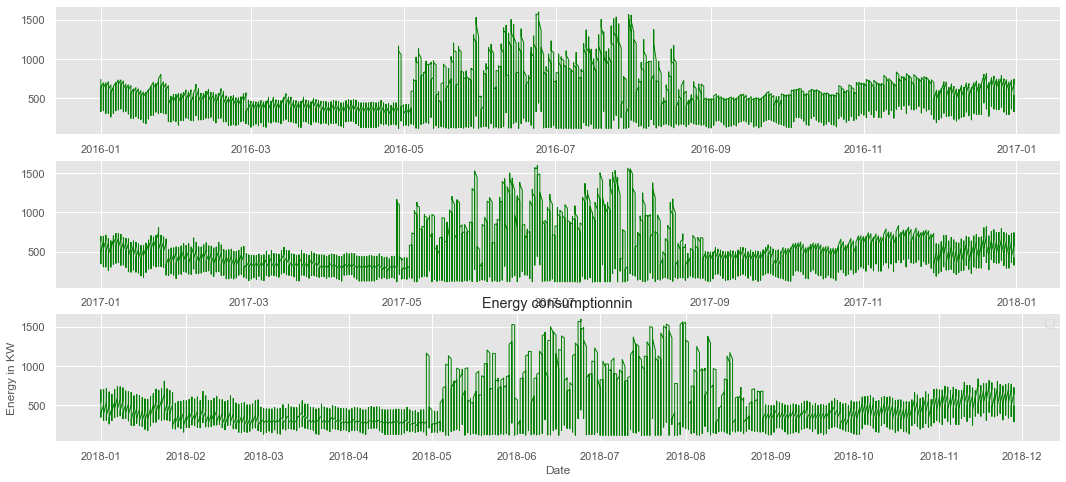

In [19]:
from matplotlib import style


fig = plt.figure()

ax7= fig.add_subplot(311)
ax8= fig.add_subplot(312)
ax9= fig.add_subplot(313)


style.use('ggplot')

y_2016 = data.loc[data["Year"]==2016]["electricity_demand_values[kw]"].to_list()
x_2016 = data.loc[data["Year"]==2016]["Date"].to_list()
ax7.plot(x_2016, y_2016, color="green", linewidth=1)



y_2017 = data.loc[data["Year"]==2017]["electricity_demand_values[kw]"].to_list()
x_2017 = data.loc[data["Year"]==2017]["Date"].to_list()
ax8.plot(x_2017, y_2017, color="green", linewidth=1)



y_2018 = data.loc[data["Year"]==2018]["electricity_demand_values[kw]"].to_list()
x_2018 = data.loc[data["Year"]==2018]["Date"].to_list()
ax9.plot(x_2018, y_2018, color="green", linewidth=1)

plt.rcParams["figure.figsize"] = (20,8)
plt.title("Energy consumptionnin")
plt.xlabel("Date")
plt.ylabel("Energy in KW")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

# Energy Distribution

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Ennergy Distribution')

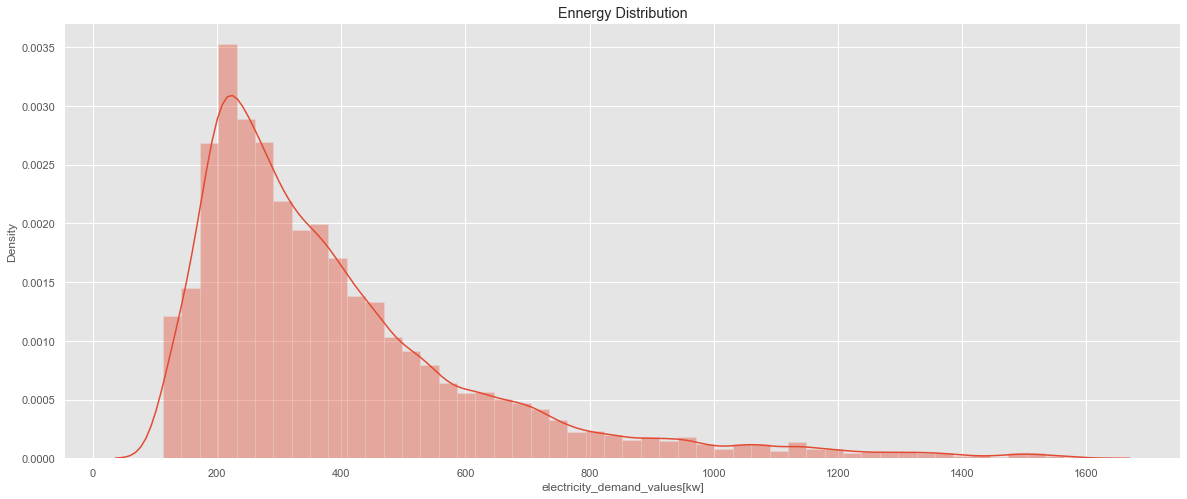

In [20]:
sns.distplot(dataset["electricity_demand_values[kw]"])
plt.title("Ennergy Distribution")

In [21]:
data['DateTime'] = data['Date'].astype(str).str.cat(data['Time'].astype(str), sep=' ')

In [22]:
data.drop(["Time","Month","Year","Date"],axis=1,inplace=True)

In [23]:
data

,air_pressure[mmHg],air_temperature[degree celcius],relative_humidity[%],wind_speed[M/S],solar_irridiation[W/m²],electricity_demand_values[kw],heat_demand_values[kw],DateTime
0,729.7,25.0,85.0,5.0,0,289.567557,432.940036,2010-12-01 00:00:00
1,729.4,27.8,77.0,7.0,0,260.168520,473.935901,2010-12-01 01:00:00
2,728.9,33.3,62.0,7.0,0,247.273585,483.278761,2010-12-01 02:00:00
3,731.6,32.2,62.0,2.0,0,257.955878,545.921252,2010-12-01 03:00:00
4,732.6,22.8,96.0,3.0,0,258.255081,550.526112,2010-12-01 04:00:00
...,...,...,...,...,...,...,...,...
70075,733.3,24.4,60.0,3.0,262,379.637300,626.192823,2018-11-28 19:00:00
70076,733.6,27.8,56.0,4.0,0,369.976634,609.519357,2018-11-28 20:00:00
70077,732.1,38.3,22.0,0.0,0,365.009491,571.465130,2018-11-28 21:00:00
70078,735.3,36.7,25.0,4.0,0,396.966494,583.703242,2018-11-28 22:00:00


In [24]:
data.set_index(["DateTime"],inplace=True)

In [25]:
data.head()

,air_pressure[mmHg],air_temperature[degree celcius],relative_humidity[%],wind_speed[M/S],solar_irridiation[W/m²],electricity_demand_values[kw],heat_demand_values[kw]
DateTime,,,,,,,
2010-12-01 00:00:00,729.7,25.0,85.0,5.0,0,289.567557,432.940036
2010-12-01 01:00:00,729.4,27.8,77.0,7.0,0,260.168520,473.935901
2010-12-01 02:00:00,728.9,33.3,62.0,7.0,0,247.273585,483.278761
2010-12-01 03:00:00,731.6,32.2,62.0,2.0,0,257.955878,545.921252
2010-12-01 04:00:00,732.6,22.8,96.0,3.0,0,258.255081,550.526112


In [26]:
data=data.astype('float')

In [27]:
data.to_csv("Cleaned_Data1.csv")

In [30]:
data2=pd.read_csv("Cleaned_Data1.csv",parse_dates=True,index_col='DateTime',low_memory=False)

In [31]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70080 entries, 2010-12-01 00:00:00 to 2018-11-28 23:00:00
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   air_pressure[mmHg]               70080 non-null  float64
 1   air_temperature[degree celcius]  70080 non-null  float64
 2   relative_humidity[%]             69903 non-null  float64
 3   wind_speed[M/S]                  70080 non-null  float64
 4   solar_irridiation[W/m²]          70080 non-null  float64
 5   electricity_demand_values[kw]    70080 non-null  float64
 6   heat_demand_values[kw]           70080 non-null  float64
dtypes: float64(7)
memory usage: 4.3 MB


In [32]:
data3=data2.resample('D').sum()
data3.head(15)

,air_pressure[mmHg],air_temperature[degree celcius],relative_humidity[%],wind_speed[M/S],solar_irridiation[W/m²],electricity_demand_values[kw],heat_demand_values[kw]
DateTime,,,,,,,
2010-12-01,17569.0,666.7,1840.0,92.000000,6404.0,8549.852211,6881.646223
2010-12-02,17510.0,684.1,1722.0,159.000000,6526.0,7910.870398,4721.360230
2010-12-03,17584.5,617.1,1716.0,113.000000,5743.0,8758.895028,8530.596629
2010-12-04,17618.1,647.8,1398.0,154.000000,6523.0,10013.066990,14129.057624
2010-12-05,17686.0,600.1,1066.0,137.000000,6258.0,10694.276861,17116.650725
2010-12-06,17526.9,676.6,1557.0,106.828268,6904.0,9259.911034,10709.736497
2010-12-07,17686.2,573.8,1529.0,91.000000,6835.0,9791.060912,12392.911177
2010-12-08,17530.7,530.9,1723.0,140.000000,6407.0,9338.504217,10372.162060
2010-12-09,17539.2,543.8,1756.0,117.000000,6327.0,8722.556863,8324.017311


In [33]:
data_train=data3.loc[:'2017-12-29',:]["electricity_demand_values[kw]"]

In [34]:
data_train.head(20)

DateTime
2010-12-01     8549.852211
2010-12-02     7910.870398
2010-12-03     8758.895028
2010-12-04    10013.066990
2010-12-05    10694.276861
2010-12-06     9259.911034
2010-12-07     9791.060912
2010-12-08     9338.504217
2010-12-09     8722.556863
2010-12-10     8308.701419
2010-12-11     9378.021443
2010-12-12     9235.271623
2010-12-13     9989.506677
2010-12-14    10497.548672
2010-12-15     9372.873155
2010-12-16     9642.006543
2010-12-17    10833.626185
2010-12-18     9970.866886
2010-12-19    10241.887128
2010-12-20    11797.296917
Freq: D, Name: electricity_demand_values[kw], dtype: float64

In [35]:
data_test=data3['2018']["electricity_demand_values[kw]"]

<ipython-input-35-9b821b3bcf84>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data_test=data3['2018']["electricity_demand_values[kw]"]


In [36]:
data_train.shape,data_test.shape

((2586,), (332,))

In [37]:
data_train

DateTime
2010-12-01     8549.852211
2010-12-02     7910.870398
2010-12-03     8758.895028
2010-12-04    10013.066990
2010-12-05    10694.276861
                  ...     
2017-12-25    11797.158706
2017-12-26    12768.689584
2017-12-27    11360.327345
2017-12-28    10720.627819
2017-12-29    10752.935644
Freq: D, Name: electricity_demand_values[kw], Length: 2586, dtype: float64

# Preparing Training Data

In [38]:
data_train=np.array(data_train)

In [39]:
x_train,y_train=[],[]

for i in range(7,len(data_train)-7):
    x_train.append(data_train[i-7:i])
    
    y_train.append(data_train[i:i+7])

In [40]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [41]:
x_train.shape,y_train.shape

((2572, 7), (2572, 7))

In [42]:
pd.DataFrame(y_train)

,0,1,2,3,4,5,6
0,9338.504217,8722.556863,8308.701419,9378.021443,9235.271623,9989.506677,10497.548672
1,8722.556863,8308.701419,9378.021443,9235.271623,9989.506677,10497.548672,9372.873155
2,8308.701419,9378.021443,9235.271623,9989.506677,10497.548672,9372.873155,9642.006543
3,9378.021443,9235.271623,9989.506677,10497.548672,9372.873155,9642.006543,10833.626185
4,9235.271623,9989.506677,10497.548672,9372.873155,9642.006543,10833.626185,9970.866886
...,...,...,...,...,...,...,...
2567,10934.820425,13449.983977,11991.819441,10321.633010,12486.377396,11944.807884,11485.200863
2568,13449.983977,11991.819441,10321.633010,12486.377396,11944.807884,11485.200863,11797.158706
2569,11991.819441,10321.633010,12486.377396,11944.807884,11485.200863,11797.158706,12768.689584
2570,10321.633010,12486.377396,11944.807884,11485.200863,11797.158706,12768.689584,11360.327345


In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
x_scaler=MinMaxScaler()

x_train=x_scaler.fit_transform(x_train)

In [45]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6
0,0.170407,0.138789,0.180751,0.242810,0.276518,0.205542,0.231825
1,0.138789,0.180751,0.242810,0.276518,0.205542,0.231825,0.209431
2,0.180751,0.242810,0.276518,0.205542,0.231825,0.209431,0.178953
3,0.242810,0.276518,0.205542,0.231825,0.209431,0.178953,0.158475
4,0.276518,0.205542,0.231825,0.209431,0.178953,0.158475,0.211387
...,...,...,...,...,...,...,...
2567,0.218771,0.273350,0.229027,0.201689,0.278357,0.251227,0.252560
2568,0.273350,0.229027,0.201689,0.278357,0.251227,0.252560,0.288420
2569,0.229027,0.201689,0.278357,0.251227,0.252560,0.288420,0.412875
2570,0.201689,0.278357,0.251227,0.252560,0.288420,0.412875,0.340722


In [46]:
y_scaler=MinMaxScaler()

y_train=y_scaler.fit_transform(y_train)

In [47]:
y_train

array([[0.20943137, 0.17895315, 0.15847482, ..., 0.20432323, 0.24164418,
        0.26678304],
       [0.17895315, 0.15847482, 0.21138676, ..., 0.24164418, 0.26678304,
        0.21113201],
       [0.15847482, 0.21138676, 0.20432323, ..., 0.26678304, 0.21113201,
        0.22444923],
       ...,
       [0.34072233, 0.25807841, 0.36519397, ..., 0.3156539 , 0.33109015,
        0.37916331],
       [0.25807841, 0.36519397, 0.33839611, ..., 0.33109015, 0.37916331,
        0.30947493],
       [0.36519397, 0.33839611, 0.3156539 , ..., 0.37916331, 0.30947493,
        0.27782141]])

In [48]:
x_train=x_train.reshape(2572,7,1)

In [49]:
x_train.shape

(2572, 7, 1)

# Build LSTM MODEL

In [50]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM,Dense

In [51]:
reg=Sequential()


reg.add(LSTM(units=200,activation='relu',input_shape=(7,1)))
reg.add(Dense(7))

In [52]:
reg.compile(loss='mse',optimizer='adam')

In [53]:
reg.fit(x_train,y_train,epochs=100 )

Epoch 1/100
81/81 [==============================] - 1s 3ms/step - loss: 0.0230
Epoch 2/100
81/81 [==============================] - 0s 3ms/step - loss: 0.0138
Epoch 3/100
81/81 [==============================] - 0s 3ms/step - loss: 0.0132
Epoch 4/100
81/81 [==============================] - 0s 3ms/step - loss: 0.0132
Epoch 5/100
81/81 [==============================] - 0s 3ms/step - loss: 0.0128
Epoch 6/100
81/81 [==============================] - 0s 3ms/step - loss: 0.0128
Epoch 7/100
81/81 [==============================] - 0s 3ms/step - loss: 0.0125
Epoch 8/100
81/81 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 9/100
81/81 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 10/100
81/81 [==============================] - 0s 3ms/step - loss: 0.0121
Epoch 11/100
81/81 [==============================] - 0s 3ms/step - loss: 0.0119
Epoch 12/100
81/81 [==============================] - 0s 3ms/step - loss: 0.0116
Epoch 13/100
81/81 [=================

# Prepare Testing Data

In [54]:
data_test=np.array(data_test)

In [55]:
x_test,y_test=[],[]

for i in range(7,len(data_test)-7):
    
    x_test.append(data_test[i-7:i])
    y_test.append(data_test[i:i+7])

In [56]:
x_test,y_test=np.array(x_test),np.array(y_test)

In [57]:
x_test=x_scaler.transform(x_test)
y_test=y_scaler.transform(y_test)

In [58]:
x_test.shape

(318, 7)

In [59]:
x_test=x_test.reshape(318,7,1)

# Predictions

In [60]:
y_pred=reg.predict(x_test)
y_pred

array([[0.29276013, 0.2848162 , 0.30628395, ..., 0.31628767, 0.30158556,
        0.31316462],
       [0.28731564, 0.28674322, 0.30658275, ..., 0.31386393, 0.30230328,
        0.2922755 ],
       [0.27252188, 0.28721404, 0.30091542, ..., 0.29113093, 0.27496353,
        0.27769905],
       ...,
       [0.29009125, 0.28461292, 0.3095373 , ..., 0.34558678, 0.34075385,
        0.3151561 ],
       [0.32661787, 0.30850536, 0.2896637 , ..., 0.34611836, 0.35592693,
        0.32748786],
       [0.30459693, 0.28090346, 0.30052012, ..., 0.29838917, 0.29620412,
        0.29121128]], dtype=float32)

In [61]:
y_predi=y_scaler.inverse_transform(y_pred)
y_predi

array([[11022.531, 10861.988, 11295.84 , ..., 11498.009, 11200.888,
        11434.894],
       [10912.5  , 10900.933, 11301.878, ..., 11449.026, 11215.392,
        11012.736],
       [10613.527, 10910.447, 11187.345, ..., 10989.605, 10662.871,
        10718.155],
       ...,
       [10968.594, 10857.88 , 11361.588, ..., 12090.127, 11992.457,
        11475.141],
       [11706.775, 11340.733, 10959.953, ..., 12100.87 , 12299.096,
        11724.357],
       [11261.745, 10782.914, 11179.355, ..., 11136.29 , 11092.132,
        10991.229]], dtype=float32)

In [62]:
y_true=y_scaler.inverse_transform(y_test)
y_true

array([[11604.7319353, 10897.4426132, 10485.3376093, ...,  9320.7177143,
         8511.7735818,  9276.0584906],
       [10897.4426132, 10485.3376093, 10127.3656134, ...,  8511.7735818,
         9276.0584906,  8464.4150034],
       [10485.3376093, 10127.3656134,  9320.7177143, ...,  9276.0584906,
         8464.4150034,  8111.222387 ],
       ...,
       [12745.7779787, 11986.1682362, 11430.4438648, ..., 12212.4135805,
        11178.2461905, 12096.5781945],
       [11986.1682362, 11430.4438648, 12834.0966237, ..., 11178.2461905,
        12096.5781945, 11658.1785831],
       [11430.4438648, 12834.0966237, 12212.4135805, ..., 12096.5781945,
        11658.1785831, 11545.0412367]])

# Evaluating MODEL

In [63]:
from sklearn.metrics import mean_squared_error

In [64]:
def evaluate(y_true,y_pred):
    
    scores=[]
    
    for i in range(y_true.shape[1]):
        mse=mean_squared_error(y_true[:, i], y_pred[:, i])
        rmse=np.sqrt(mse)
        
        scores.append(rmse)
    total_score=[]    
    for row in range(y_true.shape[0]):
        for col in range(y_pred.shape[1]):
            total_score=total_score + (y_true[row, col]- y_pred[row,col])**2
    total_score=np.sqrt(total_score/(y_true.shape[0]*y_pred.shape[1]))
    
    return total_score,scores

In [65]:
evaluate(y_true,y_pred)

(array([], dtype=float64),
 [9874.069095379797,
  9878.844451242758,
  9883.668479317581,
  9886.049003508211,
  9893.014659753348,
  9900.810097634532,
  9910.473347925981])